In [1]:
'''
My tensorflow version:  2.5.0
Is tensorflow-gpu available:  True
My sklearn version:  0.24.2
My numpy version:  1.19.5
My pandas version:  1.2.0
'''
from mylibs.training_part import show_lib_version
show_lib_version()

My tensorflow version:  2.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is tensorflow-gpu available:  True
My sklearn version:  0.24.2
My numpy version:  1.19.5
My pandas version:  1.2.0


In [2]:
from mylibs.training_part import one_run_outer, retrieve_data

### Contral panel

In [3]:
'''hyperparameters in data preparation'''
'''
file_name can be:
basic_data
prediction_data_k_means_random_feature
prediction_data_k_pca
signals
'''
file_name = 'prediction_data_k_pca'
start = '2018'                 # value;'2014'-'2021'; the start year of experiment period
split = 0.1                    # the percentage of sample for test dataset
validation_split = 0.2         # the percentage of sample in trainning dataset for validation
lookback = 10                  # time steps of LSTM
'''delete the return between (1 +/- label_threshold) in training data'''
label_threshold = 0.01

'''hyperparameters in the ML model'''
learning_rate = 0.0005
hu = 64                         # number of hidden unit in LSTM layers
layers = 2                      # the number of LSTM layers

'''hyperparameters in training'''
batch_size = 256

'''swith paramaters that do not changed often'''
activation_function = 'relu'    # any value accepted by tensorflow.keras.layers.Activation()
l2_lambda = 0.001               # l2 regularization lambda
end = '2022'                    # 2022 means experiment period ends in 2021-12-31
ts_code = '000858.SZ'

In [4]:
'''scale: for some dataset the features do not need to be scaled'''
'''no_scale_list: not really has any function in my submission'''
df, scale, no_scale_list = retrieve_data(ts_code, file_name)

1622 rows, 22 columns


------------------------------------------------------------ basic info ------------------------------------------------------------
number of training sample: 884
number of testing sample: 154
------------------------------------------------------------ model summary ------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM1 (LSTM)                 (None, 10, 64)            21760     
_________________________________________________________________
activation (Activation)      (None, 10, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
LSTM2 (LSTM)                 (None, 64)                33024     
________________________________________________________

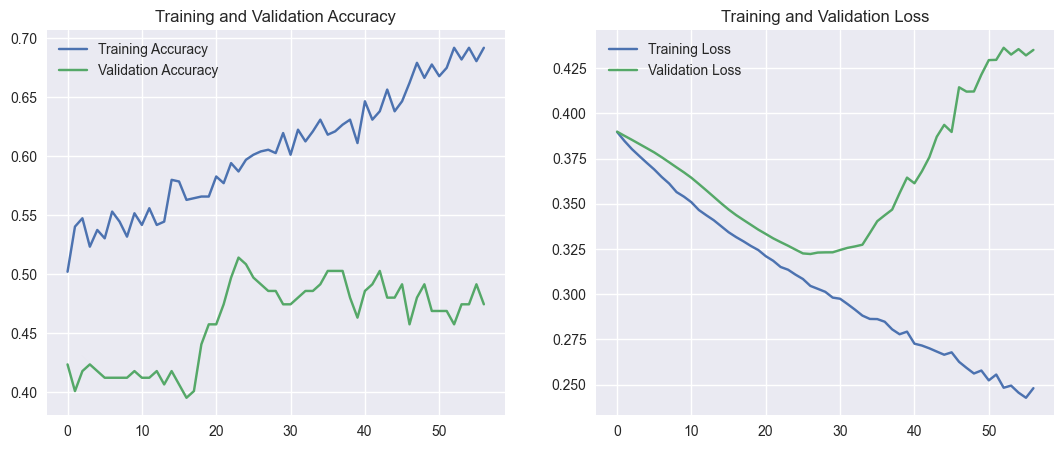

------------------------------------------------------------ test data ------------------------------------------------------------


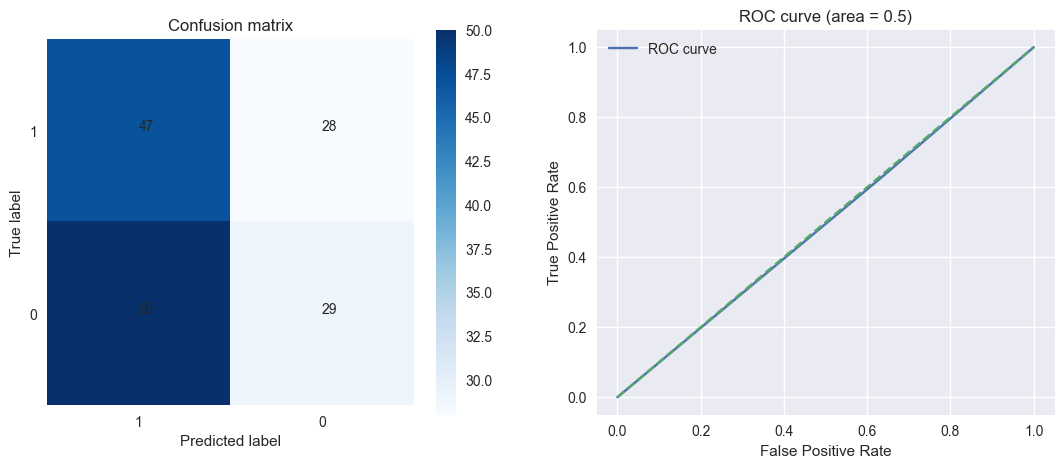

loss:  0.32288962602615356
accuracy:  0.4935064911842346
TP:  47    FP:  50    TN:  29    FN:  28
precision:  0.48453558295300725
recall:  0.6266658311122252
f1:  0.5464618148625325
CPU times: total: 6.12 s
Wall time: 6.85 s


In [5]:
%%time
one_run_outer(df, no_scale_list, file_name, split, validation_split, lookback, hu, batch_size, learning_rate,
              ts_code, layers, label_threshold, activation_function, scale)